In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyexpat.model import XML_CQUANT_PLUS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

# Data Generation and Visualization for Nonlinear Regression

This section of the Machine Learning project explains how we generate synthetic data points, add noise, and visualize the dataset. The purpose is to create a nonlinear and noisy dataset that will later be used for polynomial regression and model comparison.

---

## 📌 1. Generating the Data

```python
data = np.random.uniform(0, 1, size=25)
eps = np.random.uniform(-0.3, 0.3, size=25)
y_function = np.sin(5 * np.pi * data) + eps


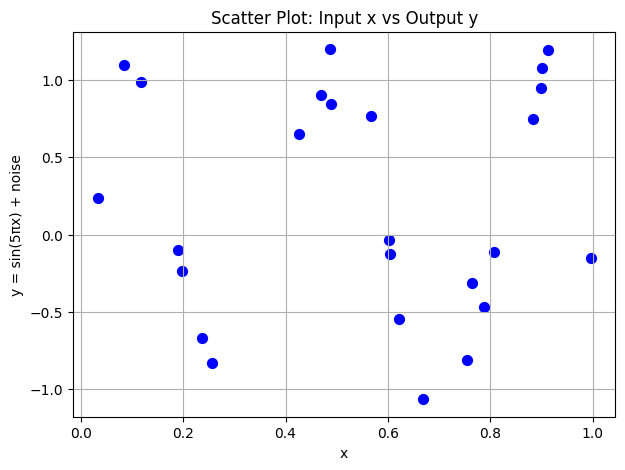

In [9]:
# Generate 25 random x-values uniformly between 0 and 1
data = np.random.uniform(0, 1, size=25)

# Generate 25 random noise values between -0.3 and 0.3
eps = np.random.uniform(-0.3, 0.3, size=25)

# Compute the target y values using the nonlinear function y = sin(5πx) + noise
y_function = np.sin(5 * np.pi * data) + eps

# Create a new figure with a specific size (width=7, height=5 inches)
plt.figure(figsize=(7, 5))

# Plot the (x, y) points as a scatter plot
plt.scatter(data, y_function, color="blue", s=50)

# Reshape data from shape (25,) to (25, 1) to be compatible with ML models later
data = data.reshape(-1, 1)

# Add a title to the plot
plt.title("Scatter Plot: Input x vs Output y")

# Label the x-axis
plt.xlabel("x")

# Label the y-axis
plt.ylabel("y = sin(5πx) + noise")

# Add a grid to the background for better readability
plt.grid(True)

# Display the plot
plt.show()


### 🔍 Explanation

- **`degree = 9`**  
  We choose a polynomial of degree **9**, which means the model will use the following features:
  $$
  1,\; x,\; x^2,\; x^3,\; \ldots,\; x^9
  $$

- **`poly = PolynomialFeatures(degree=degree, include_bias=True)`**
  - `PolynomialFeatures` is a scikit-learn utility that automatically generates polynomial terms.
  - `degree=degree` tells it to generate all powers of $x$ up to $x^9$.
  - `include_bias=True` adds a column of ones (the bias term), which corresponds to the intercept in linear regression.

- **`X_poly = poly.fit_transform(data)`**
  - This transforms the original `data` with shape **(25, 1)** into a new feature matrix `X_poly`.
  - The resulting shape is:
    $$
    (25,\; \text{degree} + 1) = (25,\; 10)
    $$
  - This means:
    - **1 column** for the bias term (all ones)
    - **9 columns** for the polynomial terms:
      $$
      x,\; x^2,\; x^3,\; \ldots,\; x^9
      $$

These polynomial features will be used as input to our regression model, allowing it to fit a flexible nonlinear function instead of a simple straight line.

In [10]:
# Set the degree for polynomial expansion
degree = 9

# Create the PolynomialFeatures transformer (with bias term included)
poly = PolynomialFeatures(degree=degree, include_bias=True)

# Transform the original data into polynomial features
X_poly = poly.fit_transform(data)   # Output shape: (25, degree + 1)



## 📌 Ridge Regression with Polynomial Features (Model Comparison)

In this step, we evaluate how different values of the Ridge regularization parameter $\alpha$ affect the model's ability to generalize. We train several Ridge models using polynomial features and compare their prediction curves against the true function.

### 🔍 Explanation

#### 1. Regularization strengths
```python
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]
```
We consider different values of $\alpha$ (regularization strength):
- $\alpha = 0$ → no regularization (pure polynomial regression)
- Larger $\alpha$ → stronger penalty that reduces overfitting

#### 2. Generate many test points for a smooth prediction curve
```python
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
x_test_poly = poly.transform(x_test)
```
- Creates **500 evenly spaced points** in $[0, 1]$
- Transforms them using the same polynomial features
- This ensures the plotted curves look smooth

#### 3. Compute the true function (without noise)
```python
y_true = np.sin(5 * np.pi * x_test)
```
This represents the ideal target function:
$$
y = \sin(5\pi x)
$$
It allows us to compute generalization error.

#### 4. Train Ridge models and compute predictions
For each value of $\alpha$:
```python
model = Ridge(alpha=alpha, fit_intercept=False)
model.fit(X_poly, y_function)
y_pred_test = model.predict(x_test_poly)
```
- Train Ridge regression on noisy data
- Predict on smooth test grid

#### 5. Compute generalization error (MSE)
```python
mse_test = mean_squared_error(y_true, y_pred_test)
results.append((alpha, mse_test))
```
This compares:
- **Model predictions** against **the true clean function**
- This reveals how well the model generalizes, not only fits noise

#### 6. Plot model predictions
```python
plt.plot(x_test, y_pred_test, label=f'alpha={alpha}, MSE={mse_test:.3f}')
```
Each curve shows how the chosen $\alpha$ affects smoothness and accuracy.

#### 7. Plot the true function
```python
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')
```
The dashed line is the reference curve.

#### 8. Display MSE results
```python
print("Generalization MSE vs sin(5πx):")
```
This prints the test errors for each $\alpha$, making it easy to compare performance.

---


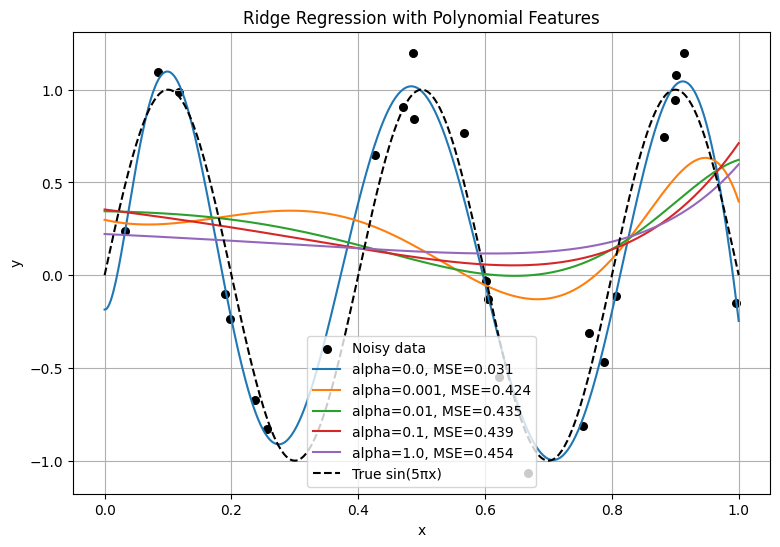

Generalization MSE vs sin(5πx):
  alpha=   0.0: MSE=0.0313
  alpha= 0.001: MSE=0.4237
  alpha=  0.01: MSE=0.4347
  alpha=   0.1: MSE=0.4393
  alpha=   1.0: MSE=0.4536


In [11]:
# Different regularization strengths (alpha values) for Ridge regression
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]

# Create a dense grid of x values for smooth prediction curves
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
x_test_poly = poly.transform(x_test)

# True underlying function (without noise)
y_true = np.sin(5 * np.pi * x_test)

# List to store (alpha, MSE) results
results = []

# Initialize the figure
plt.figure(figsize=(9, 6))

# Plot the original noisy data
plt.scatter(data, y_function, color="black", s=30, label="Noisy data")

# Train and evaluate a Ridge model for each alpha
for alpha in lambdas:
    # Define and fit the Ridge regression model
    model = Ridge(alpha=alpha, fit_intercept=False)
    model.fit(X_poly, y_function)

    # Predict on the dense test grid
    y_pred_test = model.predict(x_test_poly)

    # Compute generalization error vs. the true (noise-free) function
    mse_test = mean_squared_error(y_true, y_pred_test)
    results.append((alpha, mse_test))

    # Plot the model's prediction curve
    plt.plot(x_test, y_pred_test, label=f'alpha={alpha}, MSE={mse_test:.3f}')

# Plot the true underlying function
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')

# Add plot details
plt.title('Ridge Regression with Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print the generalization MSE for each alpha
print("Generalization MSE vs sin(5πx):")
for alpha, mse in results:
    print(f"  alpha={alpha:6}: MSE={mse:.4f}")


## 📊 General Conclusion (Same Number of Data Points)

When using the same number of data points (**25 samples**) to fit a nonlinear function such as
$$
y = \sin(5\pi x) + \epsilon,
$$
we observe that the model's performance is highly sensitive to the choice of model complexity and regularization. The results show the following important behavior:

---

### 1. High-degree polynomial models (e.g., degree = 9) are unstable with few data points

A degree-9 polynomial has **many parameters** relative to only 25 samples. This causes **high variance**, meaning the model is extremely sensitive to:
- The exact location of the sample points
- The amount and pattern of noise
- The regularization strength $\alpha$

Even small differences in the dataset can drastically change the model's predictions.

---

### 2. Without regularization ($\alpha = 0$), the model often overfits

With $\alpha = 0$:
- The model fits the **noise** in the dataset
- The curve becomes very **wiggly**, especially near boundaries
- Surprisingly, in some cases it may appear to match the true function well—but this is **coincidental** and does not generalize

**Overfitting remains the dominant risk.**

---

### 3. With regularization ($\alpha > 0$), the model tends to underfit

For $\alpha$ between 0.001 and 1.0:
- The polynomial coefficients **shrink**
- The curve becomes **too smooth**
- The model fails to capture the oscillations of $\sin(5\pi x)$

This is **high bias behavior**: the model is too simple after regularization.

---

### 4. The optimal $\alpha$ changes depending on the exact data sampled

Because we have only 25 samples:
- The same model may behave **differently across datasets**
- The "best $\alpha$" can change even if the number of data points stays the same
- This instability is a direct consequence of having **too few points** for such a flexible model

---

### 5. Increasing data points would stabilize the model

More samples (e.g., 100, 200, 500) help:
- Reduce **variance**
- Improve **generalization**
- Let regularization work more effectively
- Allow high-degree polynomials to behave more reliably

**Thus, the primary limitation in this experiment is the small dataset size.**

---

### 🎯 Key Takeaway

With only 25 data points:
- **Too little regularization** → overfitting (wiggly curves)
- **Too much regularization** → underfitting (overly smooth curves)
- **More data** is the most effective solution to achieve stable, generalizable models

## 🎯 Kernel Ridge Regression with RBF Kernel

In this section, we use **Kernel Ridge Regression** with a **Radial Basis Function (RBF) kernel** instead of explicit polynomial features. This approach allows the model to learn complex nonlinear patterns by implicitly mapping data into a high-dimensional space.
```python
gamma = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1]
results = []
alpha = 0.008

for g in gamma:
    model = KernelRidge(alpha=alpha, kernel='rbf', gamma=1/float(g))
    model.fit(data, y_function)
    y_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_true, y_pred)
    results.append((g, mse_test))

    plt.plot(x_test, y_pred, label=f'gamma={g}, MSE={mse_test:.3f}')

# plot true function
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')

plt.title('Kernel Ridge Regression with RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Generalization MSE vs sin(5πx):")
for g, mse in results:
    print(f"  gamma={g:6}: MSE={mse:.4f}")
```

---

### 🔍 Explanation

#### 1. Define candidate gamma values
```python
gamma = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1]
results = []
alpha = 0.008
```

- **`gamma`** is a list of values that control the shape of the RBF kernel
- **`alpha`** is the regularization strength (like $\lambda$ in ridge regression)
- **`results`** will store pairs `(g, mse)` so you can see which gamma works best

**Understanding gamma in RBF kernels:**

In RBF kernels, $\gamma$ controls how "local" the influence of each point is:
- **Large $\gamma$** → very wiggly, high-variance function
- **Small $\gamma$** → smoother, more global function

**Note:** In this code, you don't pass `g` directly; you pass `1/g` (explained below).

---

#### 2. Loop over gamma values and train Kernel Ridge models
```python
for g in gamma:
    model = KernelRidge(alpha=alpha, kernel='rbf', gamma=1/float(g))
    model.fit(data, y_function)
    y_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_true, y_pred)
    results.append((g, mse_test))

    plt.plot(x_test, y_pred, label=f'gamma={g}, MSE={mse_test:.3f}')
```

For each value `g` in the list, we perform the following steps:

##### Step 2.1: Create the model
```python
model = KernelRidge(alpha=alpha, kernel='rbf', gamma=1/float(g))
```

- **`KernelRidge`** performs ridge regression in a kernel (feature) space instead of using explicit polynomial features
- **`kernel='rbf'`** uses the **Radial Basis Function** kernel:
  $$
  K(x, x') = \exp(-\gamma \|x - x'\|^2)
  $$
- **`gamma=1/g`** means:
  - `g = 0.01` → `gamma = 100` (very local, very wiggly)
  - `g = 0.1` → `gamma = 10` (smoother)

##### Step 2.2: Fit the model
```python
model.fit(data, y_function)
```
- Trains Kernel Ridge using your **25 noisy points**

##### Step 2.3: Predict on a dense grid
```python
y_pred = model.predict(x_test)
```
- `x_test` contains many points in $[0, 1]$, so the curve will be smooth when plotted

##### Step 2.4: Compute generalization error against the true function
```python
mse_test = mean_squared_error(y_true, y_pred)
```
- `y_true = sin(5πx_test)` (without noise)
- This tells you how close the model's curve is to the actual sine function

##### Step 2.5: Store and plot
```python
results.append((g, mse_test))
plt.plot(x_test, y_pred, label=f'gamma={g}, MSE={mse_test:.3f}')
```
- Save `(g, mse)` in `results` for printing later
- Plot each model's prediction curve, with its gamma and MSE in the legend

---

#### 3. Plot the true function
```python
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')
```

- **Dashed black line** = the real function you're trying to approximate

Then add plot formatting:
```python
plt.title('Kernel Ridge Regression with RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
```

These lines prettify the plot with title, labels, legend, and grid.

---

#### 4. Print the MSE for each gamma
```python
print("Generalization MSE vs sin(5πx):")
for g, mse in results:
    print(f"  gamma={g:6}: MSE={mse:.4f}")
```

This prints a table like:
```
gamma= 0.01: MSE=...
gamma= 0.02: MSE=...
...
```

You can see which **gamma gives the lowest MSE**, i.e., the best approximation of $\sin(5\pi x)$.

---

### 🎯 Key Insights

- **Kernel Ridge Regression** uses the **kernel trick** to implicitly work in high-dimensional space without computing polynomial features explicitly
- The **RBF kernel** is controlled by $\gamma$:
  - Small $\gamma$ (large `g`) → smoother, more generalized function
  - Large $\gamma$ (small `g`) → more complex, potentially overfit function
- **Regularization** ($\alpha$) still helps prevent overfitting, just like in polynomial ridge regression
- The optimal `g` value balances **bias** (underfitting) and **variance** (overfitting)

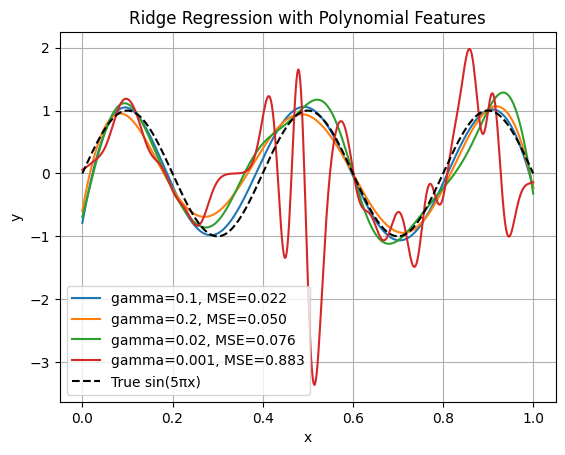

Generalization MSE vs sin(5πx):
  gamma=   0.1: MSE=0.0219
  gamma=   0.2: MSE=0.0504
  gamma=  0.02: MSE=0.0764
  gamma= 0.001: MSE=0.8831


In [15]:
gamma = [0.1, 0.2, 0.02, 0.001]
results = []
alpha = 0.0001
for g in gamma:
    model = KernelRidge(alpha=alpha, kernel='rbf', gamma=1/float(g))
    model.fit(data, y_function)
    y_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_true, y_pred)
    results.append((g, mse_test))

    plt.plot(x_test, y_pred, label=f'gamma={g}, MSE={mse_test:.3f}')

# plot true function
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')

plt.title('Ridge Regression with Polynomial Features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Generalization MSE vs sin(5πx):")
for g, mse in results:
    print(f"  gamma={g:6}: MSE={mse:.4f}")

## 📐 Full Explanation (Conceptual)

This section explains the mathematical foundation and implementation details of polynomial regression using the **normal equation** approach.

---

### 1️⃣ Building the Polynomial Design Matrix $X_{\text{poly}}$

You want to fit a polynomial regression model of degree **9**:
$$
y \approx w_0 + w_1 x + w_2 x^2 + \dots + w_9 x^9
$$

To do that, you construct a **design matrix** $X_{\text{poly}}$ where:
- Each **row** corresponds to one data point
- Each **column** is one feature (powers of $x$)

$$
X_{\text{poly}} = \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^9 \\
1 & x_2 & x_2^2 & \dots & x_2^9 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{25} & x_{25}^2 & \dots & x_{25}^9
\end{bmatrix}
$$

**Implementation steps:**
- First, ensure each vector (`data`, `ones`, `deg_2`, …, `deg_9`) is a **column vector** of shape `(25, 1)` using `.reshape(-1, 1)`
- Then **horizontally stack** them with `np.hstack(...)` to form `X_poly` of shape `(25, 10)`
- The target values are stored in `y` with shape `(25, 1)`

---

### 2️⃣ Solving Linear Regression via the Normal Equation

You are implementing **ordinary least squares** manually. The goal is to find the weight vector $w$ that minimizes the squared error:
$$
\min_w \| X_{\text{poly}} w - y \|^2
$$

The **closed-form solution** (normal equation) is:
$$
w = (X^T X)^{-1} X^T y
$$

**In code:**
```python
XT = X_poly.T                          # X^T
XT_X = XT @ X_poly                     # X^T X
XT_X_inv = np.linalg.pinv(XT_X)       # (X^T X)^{-1}
weights = XT_X_inv @ XT @ y            # final weight vector w
```

**Key steps:**
- `XT = X_poly.T` → $X^T$
- `XT_X = XT @ X_poly` → $X^T X$
- `XT_X_inv = np.linalg.pinv(XT_X)` → pseudo-inverse of $X^T X$
- `weights = XT_X_inv @ XT @ y` → final weight vector $w$ with shape `(10, 1)`

**Important note:**  
`np.linalg.pinv` is used instead of `np.linalg.inv` because $X^T X$ can be close to **singular** (especially with high-degree polynomials), and the **pseudo-inverse** is more numerically stable.

---

### 3️⃣ Optional: Predictions on Training Points
```python
data_points = X_poly @ weights
```

- This computes the **fitted values** $\hat{y}$ at the original 25 $x$-values
- Shape is `(25, 1)`
- You don't plot these separately here, but they represent how well the polynomial fits the training data

---

### 4️⃣ Building Features for a Smooth Test Grid

You want a **smooth curve** for plotting, so you:
```python
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
```

- Creates **500 evenly spaced points** between 0 and 1

Then you define `build_poly_features(x, degree)`, which:
- Takes a 1D input array `x` and a `degree`
- Builds a matrix $\Phi$ with columns:
  $$
  [1,\ x,\ x^2,\ \dots,\ x^{\text{degree}}]
  $$
- Returns `Phi` with shape `(n_samples, degree+1)`

You call:
```python
degree = 9
x_poly = build_poly_features(x_test, degree)  # (500, 10)
y_pred = x_poly @ weights                     # (500, 1)
```

So `y_pred` is the model's **prediction on the dense grid**.

---

### 5️⃣ Plotting the Result

Finally, you visualize:

**The noisy data points:**
```python
plt.scatter(data, y_function, ...)
```

**The fitted polynomial curve:**
```python
plt.plot(x_test, y_pred, label=f'Polynomial degree {degree}')
```

This lets you see:
- How well the degree-9 polynomial passes through / near the noisy points
- How **smooth or wiggly** the fitted curve is over the whole interval $[0, 1]$

---

### 🎯 Summary

| Step | Purpose | Key Formula |
|------|---------|-------------|
| **1. Design Matrix** | Transform data into polynomial features | $X_{\text{poly}} = [1, x, x^2, \dots, x^9]$ |
| **2. Normal Equation** | Find optimal weights analytically | $w = (X^T X)^{-1} X^T y$ |
| **3. Training Predictions** | Evaluate fit on training data | $\hat{y}_{\text{train}} = X_{\text{poly}} w$ |
| **4. Test Grid** | Generate smooth predictions | $\hat{y}_{\text{test}} = \Phi_{\text{test}} w$ |
| **5. Visualization** | Compare model to data | Plot scatter + curve |

**Key advantage of this approach:**  
Provides a **closed-form solution** without iterative optimization, though it can be numerically unstable for high-degree polynomials or ill-conditioned data.

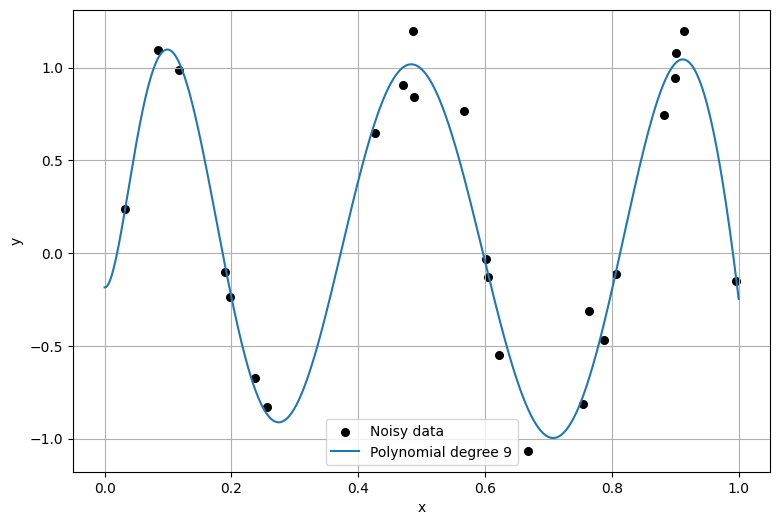

In [12]:
# ===== 1) Build the polynomial design matrix X manually =====

# Make sure data is (25, 1)
data = data.reshape(-1, 1)

# Create bias term (column of ones)
ones = np.ones((data.shape[0], 1))

# Build higher-degree terms
deg_2 = data**2
deg_3 = data**3
deg_4 = data**4
deg_5 = data**5
deg_6 = data**6
deg_7 = data**7
deg_8 = data**8
deg_9 = data**9

# Stack all powers horizontally => shape (25, 10)
X_poly = np.hstack((
    ones,
    data,
    deg_2, deg_3, deg_4, deg_5, deg_6, deg_7, deg_8, deg_9
))

# Target values y
y = np.asarray(y_function).reshape(-1, 1)


# ===== 2) Solve linear regression using the normal equation =====

# X^T and X^T X
XT   = X_poly.T                 # shape: (10, 25)
XT_X = XT @ X_poly              # shape: (10, 10)

# Pseudo-inverse of X^T X (in case it is ill-conditioned)
XT_X_inv = np.linalg.pinv(XT_X) # shape: (10, 10)

# Weights: w = (X^T X)^(-1) X^T y   => shape: (10, 1)
weights = XT_X_inv @ XT @ y


# ===== 3) Predictions on the training points (optional) =====

data_points = X_poly @ weights  # shape: (25, 1)


# ===== 4) Build polynomial features for a smooth test grid =====

# Create a dense grid in [0, 1] for plotting the fitted curve
x_test = np.linspace(0, 1, 500).reshape(-1, 1)

def build_poly_features(x, degree):
    """
    Build polynomial features [1, x, x^2, ..., x^degree].

    Parameters
    ----------
    x : array-like, shape (n_samples, 1)
        Input data.
    degree : int
        Maximum power of x.

    Returns
    -------
    Phi : ndarray, shape (n_samples, degree+1)
        Design matrix with columns [1, x, x^2, ..., x^degree].
    """
    x = np.asarray(x).reshape(-1, 1)
    n = x.shape[0]

    # Start with all ones for the bias term
    Phi = np.ones((n, degree + 1))

    # Fill in powers x^1, x^2, ..., x^degree
    for d in range(1, degree + 1):
        Phi[:, d] = x[:, 0] ** d

    return Phi

# Use the same degree (9) as in X_poly
degree = 9
x_poly = build_poly_features(x_test, degree)  # shape: (500, 10)

# Predict y on the dense grid
y_pred = x_poly @ weights                     # shape: (500, 1)


# ===== 5) Plot the noisy data and the fitted polynomial curve =====

plt.figure(figsize=(9, 6))

# Original noisy data points
plt.scatter(data, y_function, color="black", s=30, label="Noisy data")

# Fitted polynomial curve
plt.plot(x_test, y_pred, label=f'Polynomial degree {degree}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 📐 Full Explanation (Conceptual)

This section explains the mathematical foundation and implementation details of polynomial regression using the **normal equation** approach.

---

### 1️⃣ Building the Polynomial Design Matrix $X_{\text{poly}}$

You want to fit a polynomial regression model of degree **9**:
$$
y \approx w_0 + w_1 x + w_2 x^2 + \dots + w_9 x^9
$$

To do that, you construct a **design matrix** $X_{\text{poly}}$ where:
- Each **row** corresponds to one data point
- Each **column** is one feature (powers of $x$)

$$
X_{\text{poly}} = \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^9 \\
1 & x_2 & x_2^2 & \dots & x_2^9 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{25} & x_{25}^2 & \dots & x_{25}^9
\end{bmatrix}
$$

**Implementation steps:**
- First, ensure each vector (`data`, `ones`, `deg_2`, …, `deg_9`) is a **column vector** of shape `(25, 1)` using `.reshape(-1, 1)`
- Then **horizontally stack** them with `np.hstack(...)` to form `X_poly` of shape `(25, 10)`
- The target values are stored in `y` with shape `(25, 1)`

---

### 2️⃣ Solving Linear Regression via the Normal Equation

You are implementing **ordinary least squares** manually. The goal is to find the weight vector $w$ that minimizes the squared error:
$$
\min_w \| X_{\text{poly}} w - y \|^2
$$

The **closed-form solution** (normal equation) is:
$$
w = (X^T X)^{-1} X^T y
$$

**In code:**
```python
XT = X_poly.T                          # X^T
XT_X = XT @ X_poly                     # X^T X
XT_X_inv = np.linalg.pinv(XT_X)       # (X^T X)^{-1}
weights = XT_X_inv @ XT @ y            # final weight vector w
```

**Key steps:**
- `XT = X_poly.T` → $X^T$
- `XT_X = XT @ X_poly` → $X^T X$
- `XT_X_inv = np.linalg.pinv(XT_X)` → pseudo-inverse of $X^T X$
- `weights = XT_X_inv @ XT @ y` → final weight vector $w$ with shape `(10, 1)`

**Important note:**  
`np.linalg.pinv` is used instead of `np.linalg.inv` because $X^T X$ can be close to **singular** (especially with high-degree polynomials), and the **pseudo-inverse** is more numerically stable.

---

### 3️⃣ Optional: Predictions on Training Points
```python
data_points = X_poly @ weights
```

- This computes the **fitted values** $\hat{y}$ at the original 25 $x$-values
- Shape is `(25, 1)`
- You don't plot these separately here, but they represent how well the polynomial fits the training data

---

### 4️⃣ Building Features for a Smooth Test Grid

You want a **smooth curve** for plotting, so you:
```python
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
```

- Creates **500 evenly spaced points** between 0 and 1

Then you define `build_poly_features(x, degree)`, which:
- Takes a 1D input array `x` and a `degree`
- Builds a matrix $\Phi$ with columns:
  $$
  [1,\ x,\ x^2,\ \dots,\ x^{\text{degree}}]
  $$
- Returns `Phi` with shape `(n_samples, degree+1)`

You call:
```python
degree = 9
x_poly = build_poly_features(x_test, degree)  # (500, 10)
y_pred = x_poly @ weights                     # (500, 1)
```

So `y_pred` is the model's **prediction on the dense grid**.

---

### 5️⃣ Plotting the Result

Finally, you visualize:

**The noisy data points:**
```python
plt.scatter(data, y_function, ...)
```

**The fitted polynomial curve:**
```python
plt.plot(x_test, y_pred, label=f'Polynomial degree {degree}')
```

This lets you see:
- How well the degree-9 polynomial passes through / near the noisy points
- How **smooth or wiggly** the fitted curve is over the whole interval $[0, 1]$

---

### 🎯 Summary

| Step | Purpose | Key Formula |
|------|---------|-------------|
| **1. Design Matrix** | Transform data into polynomial features | $X_{\text{poly}} = [1, x, x^2, \dots, x^9]$ |
| **2. Normal Equation** | Find optimal weights analytically | $w = (X^T X)^{-1} X^T y$ |
| **3. Training Predictions** | Evaluate fit on training data | $\hat{y}_{\text{train}} = X_{\text{poly}} w$ |
| **4. Test Grid** | Generate smooth predictions | $\hat{y}_{\text{test}} = \Phi_{\text{test}} w$ |
| **5. Visualization** | Compare model to data | Plot scatter + curve |

**Key advantage of this approach:**  
Provides a **closed-form solution** without iterative optimization, though it can be numerically unstable for high-degree polynomials or ill-conditioned data.

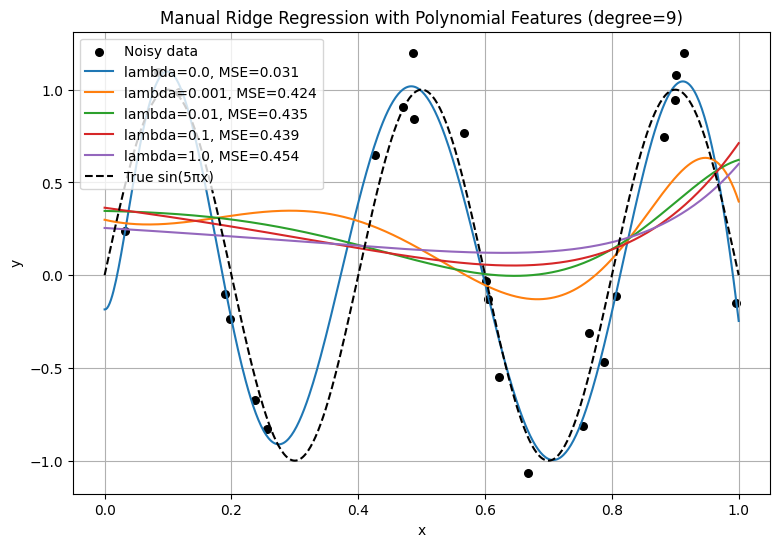

Generalization MSE vs sin(5πx):
  lambda=   0.0: MSE=0.0313
  lambda= 0.001: MSE=0.4237
  lambda=  0.01: MSE=0.4347
  lambda=   0.1: MSE=0.4391
  lambda=   1.0: MSE=0.4537


In [13]:
from sklearn.metrics import mean_squared_error

# Lambdas to test
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]

# Precompute some common matrices
XT   = X_poly.T                    # (10, 25)
XT_X = XT @ X_poly                 # (10, 10)
d    = X_poly.shape[1]             # number of features = 10

# Dense grid for smooth curves
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
x_poly_test = build_poly_features(x_test, degree)   # (500, 10)
y_true = np.sin(5 * np.pi * x_test)                # true function (no noise)

results = []

plt.figure(figsize=(9, 6))

# Plot noisy training data
plt.scatter(data, y_function, color="black", s=30, label="Noisy data")

for lam in lambdas:
    # Identity matrix; set [0,0]=0 if you don't want to penalize the bias term
    I = np.eye(d)
    I[0, 0] = 0   # comment this line if you DO want to penalize the bias

    # Ridge solution: w = (X^T X + λ I)^(-1) X^T y
    XT_X_l2_inv = np.linalg.pinv(XT_X + lam * I)
    w_ridge = XT_X_l2_inv @ XT @ y        # (10, 1)

    # Predict on dense grid
    y_pred = x_poly_test @ w_ridge        # (500, 1)

    # Generalization error vs true function
    mse = mean_squared_error(y_true, y_pred)
    results.append((lam, mse))

    # Plot curve for this lambda
    plt.plot(x_test, y_pred, label=f'lambda={lam}, MSE={mse:.3f}')

# Plot true underlying function
plt.plot(x_test, y_true, 'k--', label='True sin(5πx)')

plt.title('Manual Ridge Regression with Polynomial Features (degree=9)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Generalization MSE vs sin(5πx):")
for lam, mse in results:
    print(f"  lambda={lam:6}: MSE={mse:.4f}")
